In [ ]:
#importing neecessary libraries
import pandas as pd
from google.colab import drive
from google.colab import files
import os


In [ ]:
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/temperatures.csv")

In [ ]:
# rename all columns to english
df.rename(columns={'Produkt_Code':'Product code','SDO_ID':'SDO_ID','Zeitstempel':'time stamp','Wert':'value','Qualitaet_Niveau':'Quality_level','Qualitaet_Byte':'Quality_Byte'},inplace = True)

In [ ]:
df

,Product code,SDO_ID,time stamp,value,Quality_level,Quality_Byte
0,TT_TU_MN009,2014,201501010000,3.4,7,6
1,TT_TU_MN009,2014,201501010100,3.1,7,6
2,TT_TU_MN009,2014,201501010200,2.6,7,1
3,TT_TU_MN009,2014,201501010300,2.8,7,1
4,TT_TU_MN009,2014,201501010400,2.5,7,1
...,...,...,...,...,...,...
45163,TT_TU_MN009,2014,202002251900,5.3,0,1
45164,TT_TU_MN009,2014,202002252000,5.5,0,1
45165,TT_TU_MN009,2014,202002252100,5.4,0,1
45166,TT_TU_MN009,2014,202002252200,3.8,0,1


In [ ]:
#To get the unique values in that sdo column
df['SDO_ID'].unique()

array([2014])

In [ ]:
# list each column data type
df.dtypes

Product code      object
SDO_ID             int64
time stamp         int64
value            float64
Quality_level      int64
Quality_Byte       int64
dtype: object

In [ ]:
# convert datetime from float to yyyymmddhhmm format
# df['time stamp']= pd.to_datetime(df['time stamp'])
import datetime, time

df['time stamp'] = pd.to_datetime(df['time stamp'], format='%Y%m%d%H%M')

In [ ]:
df

,Product code,SDO_ID,time stamp,value,Quality_level,Quality_Byte
0,TT_TU_MN009,2014,2015-01-01 00:00:00,3.4,7,6
1,TT_TU_MN009,2014,2015-01-01 01:00:00,3.1,7,6
2,TT_TU_MN009,2014,2015-01-01 02:00:00,2.6,7,1
3,TT_TU_MN009,2014,2015-01-01 03:00:00,2.8,7,1
4,TT_TU_MN009,2014,2015-01-01 04:00:00,2.5,7,1
...,...,...,...,...,...,...
45163,TT_TU_MN009,2014,2020-02-25 19:00:00,5.3,0,1
45164,TT_TU_MN009,2014,2020-02-25 20:00:00,5.5,0,1
45165,TT_TU_MN009,2014,2020-02-25 21:00:00,5.4,0,1
45166,TT_TU_MN009,2014,2020-02-25 22:00:00,3.8,0,1


In [ ]:
# extract year for each row from time stamp, apply is used to repeat the function defined using lambda for each row in a dataframe
df['year'] = df.apply(lambda x:x['time stamp'].year,axis=1)

In [ ]:
# resampling hourly data to 15 min interval
df1 = df.resample('15Min',on='time stamp').mean()
df1

,SDO_ID,value,Quality_level,Quality_Byte,year
time stamp,,,,,
2015-01-01 00:00:00,2014.0,3.4,7.0,6.0,2015.0
2015-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,2014.0,3.1,7.0,6.0,2015.0
...,...,...,...,...,...
2020-02-25 22:00:00,2014.0,3.8,0.0,1.0,2020.0
2020-02-25 22:15:00,NaN,NaN,NaN,NaN,NaN
2020-02-25 22:30:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
#using interpolation method linear since the temperature trend over the months has been gradual to fill the NaN temperature values
df1['value'] = df1['value'].interpolate(method ='linear', limit_direction ='forward')

In [ ]:
df1

,SDO_ID,value,Quality_level,Quality_Byte,year
time stamp,,,,,
2015-01-01 00:00:00,2014.0,3.400,7.0,6.0,2015.0
2015-01-01 00:15:00,NaN,3.325,NaN,NaN,NaN
2015-01-01 00:30:00,NaN,3.250,NaN,NaN,NaN
2015-01-01 00:45:00,NaN,3.175,NaN,NaN,NaN
2015-01-01 01:00:00,2014.0,3.100,7.0,6.0,2015.0
...,...,...,...,...,...
2020-02-25 22:00:00,2014.0,3.800,0.0,1.0,2020.0
2020-02-25 22:15:00,NaN,3.750,NaN,NaN,NaN
2020-02-25 22:30:00,NaN,3.700,NaN,NaN,NaN


In [ ]:
# using forward fill na to fill null values in year column, forward fill copies the value from previous row and puts in that particular row
df1['year'] = df1['year'].fillna(method='ffill')

In [ ]:

# copying the timestmap which is the index of the dataframe to a new column called Date
df1['Date'] = df1.index

In [ ]:
df1

,SDO_ID,value,Quality_level,Quality_Byte,year,Date
time stamp,,,,,,
2015-01-01 00:00:00,2014.0,3.400,7.0,6.0,2015.0,2015-01-01 00:00:00
2015-01-01 00:15:00,NaN,3.325,NaN,NaN,2015.0,2015-01-01 00:15:00
2015-01-01 00:30:00,NaN,3.250,NaN,NaN,2015.0,2015-01-01 00:30:00
2015-01-01 00:45:00,NaN,3.175,NaN,NaN,2015.0,2015-01-01 00:45:00
2015-01-01 01:00:00,2014.0,3.100,7.0,6.0,2015.0,2015-01-01 01:00:00
...,...,...,...,...,...,...
2020-02-25 22:00:00,2014.0,3.800,0.0,1.0,2020.0,2020-02-25 22:00:00
2020-02-25 22:15:00,NaN,3.750,NaN,NaN,2020.0,2020-02-25 22:15:00
2020-02-25 22:30:00,NaN,3.700,NaN,NaN,2020.0,2020-02-25 22:30:00


In [ ]:
df1 = df1.reset_index(drop = True)

In [ ]:
# using groupby to extract lowest temperature for each year, the function idxmin will return the row id which has the lowest min value, using the row id we reteive the date, year and corresponding temperature value
# lowest temperature every year
df1.loc[df1.reset_index().groupby(['year'])['value'].idxmin()][['Date','year','value']]

,Date,year,value
3568,2015-02-07 04:00:00,2015.0,-6.6
37064,2016-01-22 02:00:00,2016.0,-12.0
70676,2017-01-06 05:00:00,2017.0,-10.5
111000,2018-03-02 06:00:00,2018.0,-11.8
142200,2019-01-21 06:00:00,2019.0,-9.0
175328,2020-01-01 08:00:00,2020.0,-4.6


In [ ]:
# similar to the above explanation but the idxmax will return the row id for maximum value
# highest temperature every year
df1.loc[df1.reset_index().groupby(['year'])['value'].idxmax()][['Date','year','value']]

,Date,year,value
17720,2015-07-04 14:00:00,2015.0,36.0
58136,2016-08-28 14:00:00,2016.0,34.0
86732,2017-06-22 11:00:00,2017.0,31.9
126204,2018-08-07 15:00:00,2018.0,35.6
159988,2019-07-25 13:00:00,2019.0,37.4
179788,2020-02-16 19:00:00,2020.0,17.7


In [ ]:
s2015 = df1[df1['year'] == 2015]
s2015.sort_values(by='value',ascending=False)

,SDO_ID,value,Quality_level,Quality_Byte,year,Date
17720,2014.0,36.000,7.0,1.0,2015.0,2015-07-04 14:00:00
17719,NaN,35.925,NaN,NaN,2015.0,2015-07-04 13:45:00
17718,NaN,35.850,NaN,NaN,2015.0,2015-07-04 13:30:00
17717,NaN,35.775,NaN,NaN,2015.0,2015-07-04 13:15:00
17721,NaN,35.750,NaN,NaN,2015.0,2015-07-04 14:15:00
...,...,...,...,...,...,...
3575,NaN,-6.450,NaN,NaN,2015.0,2015-02-07 05:45:00
3576,2014.0,-6.500,7.0,1.0,2015.0,2015-02-07 06:00:00
3567,NaN,-6.500,NaN,NaN,2015.0,2015-02-07 03:45:00
3569,NaN,-6.525,NaN,NaN,2015.0,2015-02-07 04:15:00


In [ ]:
#plot 
# for plotting the temperature vs time plot, we form a seperate dataframe with highest temperature for each year and its corresponding time of occurence. Similarly we have a dataframe called cold days and use seaborn scatterplot to plot the data
hot_days = df1.loc[df1.reset_index().groupby(['year'])['value'].idxmax()][['Date','year','value']]
hot_days = hot_days.reset_index(drop=True)
hot_days


,Date,year,value
0,2015-07-04 14:00:00,2015.0,36.0
1,2016-08-28 14:00:00,2016.0,34.0
2,2017-06-22 11:00:00,2017.0,31.9
3,2018-08-07 15:00:00,2018.0,35.6
4,2019-07-25 13:00:00,2019.0,37.4
5,2020-02-16 19:00:00,2020.0,17.7


In [ ]:
hot_days['time of day'] = hot_days.apply(lambda x: x['Date'].hour,axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

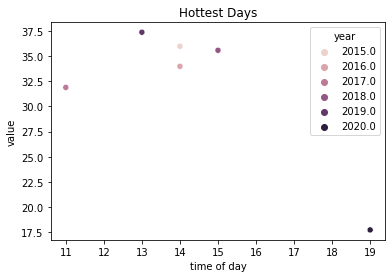

In [ ]:
import seaborn as sns 
sns.scatterplot(data=hot_days, x="time of day", y="value",hue='year').set_title("Hottest Days")
# sns.set_title('Hottest Days')
plt.savefig('sns.scatterplot.jpeg')
os.rename('sns.scatterplot.jpeg','Coldest Days.jpeg')
files.download("Hottest Days.jpeg")
# stores the information into JPEG file and downloads it.

In [ ]:
cold_days = df1.loc[df1.reset_index().groupby(['year'])['value'].idxmin()][['Date','year','value']]
cold_days = cold_days.reset_index(drop=True)
cold_days

,Date,year,value
0,2015-02-07 04:00:00,2015.0,-6.6
1,2016-01-22 02:00:00,2016.0,-12.0
2,2017-01-06 05:00:00,2017.0,-10.5
3,2018-03-02 06:00:00,2018.0,-11.8
4,2019-01-21 06:00:00,2019.0,-9.0
5,2020-01-01 08:00:00,2020.0,-4.6


In [ ]:
cold_days['time of day'] = cold_days.apply(lambda x: x['Date'].hour,axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

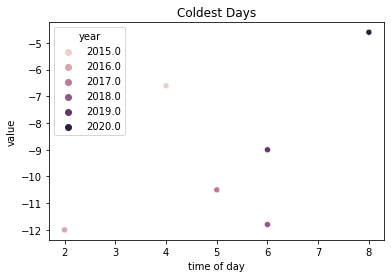

In [ ]:
sns.scatterplot(data=cold_days, x="time of day", y="value",hue='year').set_title("Coldest Days")
plt.savefig('sns.scatterplot.jpeg')
os.rename('sns.scatterplot.jpeg','Coldest Days.jpeg')
files.download("Coldest Days.jpeg")
# stores the information into JPEG file and downloads it.

In [ ]:
# more analysis
df1['Year'] = df1['Date'].astype(str).str[0:4]
df1['Month'] = df1['Date'].astype(str).str.slice(5,7)
df1.head()

,SDO_ID,value,Quality_level,Quality_Byte,year,Date,Year,Month
0,2014.0,3.400,7.0,6.0,2015.0,2015-01-01 00:00:00,2015,01
1,NaN,3.325,NaN,NaN,2015.0,2015-01-01 00:15:00,2015,01
2,NaN,3.250,NaN,NaN,2015.0,2015-01-01 00:30:00,2015,01
3,NaN,3.175,NaN,NaN,2015.0,2015-01-01 00:45:00,2015,01
4,2014.0,3.100,7.0,6.0,2015.0,2015-01-01 01:00:00,2015,01


In [ ]:
# df1.year = df1.year.apply(lambda x: str(x))
df1['month_year'] = pd.to_datetime((df1.Year+df1.Month),format='%Y%m').dt.strftime('%Y-%b')
df1.head()

,SDO_ID,value,Quality_level,Quality_Byte,year,Date,Year,Month,month_year
0,2014.0,3.400,7.0,6.0,2015.0,2015-01-01 00:00:00,2015,01,2015-Jan
1,NaN,3.325,NaN,NaN,2015.0,2015-01-01 00:15:00,2015,01,2015-Jan
2,NaN,3.250,NaN,NaN,2015.0,2015-01-01 00:30:00,2015,01,2015-Jan
3,NaN,3.175,NaN,NaN,2015.0,2015-01-01 00:45:00,2015,01,2015-Jan
4,2014.0,3.100,7.0,6.0,2015.0,2015-01-01 01:00:00,2015,01,2015-Jan


In [ ]:
df1['Date_conv'] = pd.to_datetime((df1.month_year),format='%Y-%b')

In [ ]:
df_mean = pd.DataFrame(df1.groupby(['Date_conv'], sort=True)["value"].mean())
df_mean.head(6)

,value
Date_conv,
2015-01-01,3.298656
2015-02-01,2.333464
2015-03-01,5.757644
2015-04-01,8.640382
2015-05-01,12.142154
2015-06-01,15.742743


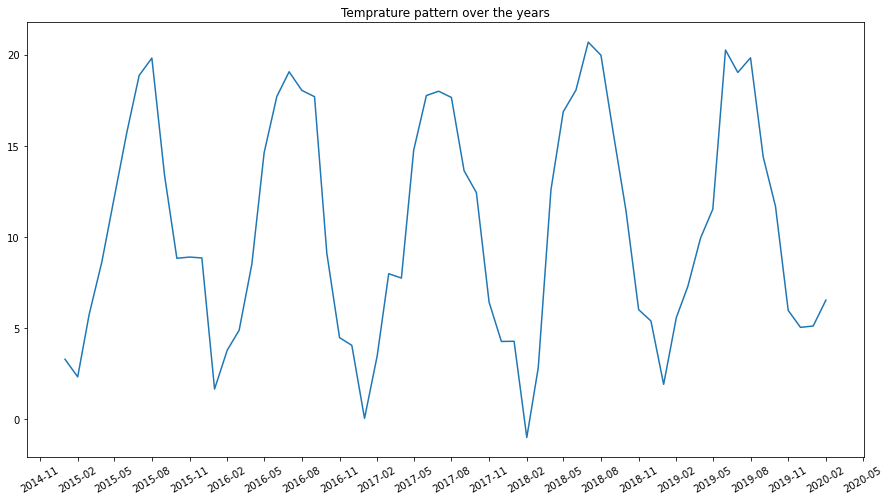

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib as mpl



fig = plt.figure(figsize=(15,8))
# plt.plot( kind='line', figsize=(15,8))
plt.plot(df_mean.index,df_mean.value)
plt.title("Temprature pattern over the years")
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator(interval = 3))
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m'))

plt.tick_params(rotation=30, axis='x')

Analysis:

We can see that the pattern of temperature is different for each year. The interesting observation here is in the year 2015 we see the peak temperatures were during june and july and it falls down for august but as the years passed we can see that the summer is longer, in 2019 we can see that summer was from May - August and then the temperature gradually has decreased. It is also observed that the 2019 summers were having two peaks.